In [1]:
import os
import pandas as pd
import numpy as np

np.random.seed(123)

In [2]:
# from sklearn.model_selection import train_test_split

# data = pd.read_csv(os.path.normpath('./data/train_data/train_task_1_2.csv'))
# train, valid = train_test_split(data, test_size=0.2)
# test_submission_ids = valid[['UserId', 'QuestionId']]

# if not os.path.isdir(os.path.normpath('./data/test_input')):
#     os.mkdir(os.path.normpath('./data/test_input'))
    
# train.to_csv(os.path.normpath('./data/test_input/train_task_1_2.csv'), index=False)
# valid.to_csv(os.path.normpath('./data/test_input/valid_task_1_2.csv'), index=False)
# test_submission_ids.to_csv(os.path.normpath('./data/test_input/test_submission_task_1_2.csv'), index=False)

In [3]:
train = pd.read_csv(os.path.normpath('./data/test_input/train_task_1_2.csv'))
valid = pd.read_csv(os.path.normpath('./data/test_input/valid_task_1_2.csv'))

In [4]:
train.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,16412,48322,11718601,1,1,1
1,25044,55690,19388171,0,4,3
2,15408,82387,4243484,1,3,3
3,8062,100080,978460,1,4,4
4,20514,12570,1921926,0,2,4


In [5]:
train.shape

(12694280, 6)

In [6]:
meta_question = pd.read_csv(os.path.normpath('./data/metadata/question_metadata_task_1_2.csv'))
meta_student = pd.read_csv(os.path.normpath('./data/metadata/student_metadata_task_1_2.csv'))

In [7]:
meta_question.head()

,QuestionId,SubjectId
0,13090,"[3, 32, 71, 77, 141, 185, 186, 214]"
1,1855,"[3, 71, 75, 86, 178]"
2,10423,"[3, 32, 38, 239]"
3,2290,"[3, 32, 33, 144]"
4,12785,"[3, 32, 33, 144]"


In [8]:
meta_student.head()

,UserId,Gender,DateOfBirth,PremiumPupil
0,58022,2,2006-08-01 00:00:00.000,1.0
1,104674,0,NaN,NaN
2,32020,2,2008-11-01 00:00:00.000,1.0
3,81780,2,2004-07-01 00:00:00.000,NaN
4,99967,0,NaN,NaN


In [9]:
train_merge = train.merge(meta_question, how='left', on='QuestionId').merge(meta_student, how='left', on='UserId')

In [10]:
train_merge.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,SubjectId,Gender,DateOfBirth,PremiumPupil
0,16412,48322,11718601,1,1,1,"[3, 101, 105, 342]",0,NaN,NaN
1,25044,55690,19388171,0,4,3,"[3, 101, 348, 350]",0,NaN,NaN
2,15408,82387,4243484,1,3,3,"[3, 71, 178, 179]",0,NaN,NaN
3,8062,100080,978460,1,4,4,"[3, 32, 39, 232]",1,2007-01-01 00:00:00.000,0.0
4,20514,12570,1921926,0,2,4,"[3, 49, 62, 70]",1,2008-02-01 00:00:00.000,0.0


In [11]:
train_merge.shape

(12694280, 10)

In [12]:
train_merge['DateOfBirth'].isnull().sum()

4073709

In [13]:
train_merge['BirthYear'] = train_merge['DateOfBirth'].apply(lambda x:float(x.split()[0].split('-')[0]) if not pd.isnull(x) else np.NaN)

In [14]:
train_merge.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,SubjectId,Gender,DateOfBirth,PremiumPupil,BirthYear
0,16412,48322,11718601,1,1,1,"[3, 101, 105, 342]",0,NaN,NaN,NaN
1,25044,55690,19388171,0,4,3,"[3, 101, 348, 350]",0,NaN,NaN,NaN
2,15408,82387,4243484,1,3,3,"[3, 71, 178, 179]",0,NaN,NaN,NaN
3,8062,100080,978460,1,4,4,"[3, 32, 39, 232]",1,2007-01-01 00:00:00.000,0.0,2007.0
4,20514,12570,1921926,0,2,4,"[3, 49, 62, 70]",1,2008-02-01 00:00:00.000,0.0,2008.0


In [15]:
train_merge['BirthYear'].value_counts()

2004.0    1997619
2003.0    1178196
2007.0    1154353
2006.0    1149949
2005.0    1146213
           ...   
2548.0         36
1921.0         34
1799.0         34
2105.0         33
1911.0         28
Name: BirthYear, Length: 142, dtype: int64

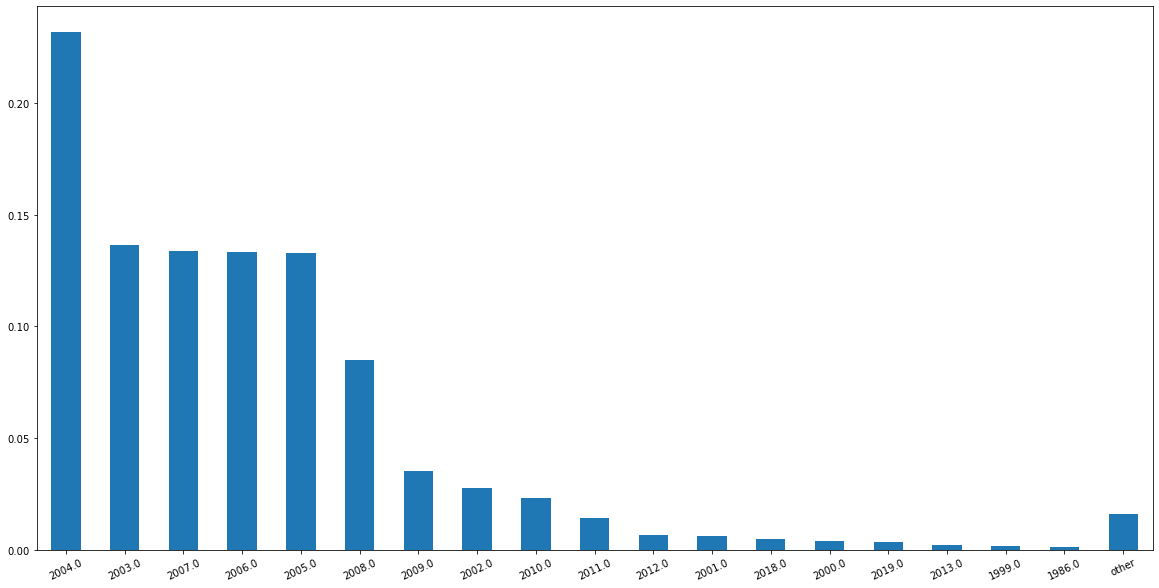

In [16]:
import matplotlib.pyplot as plt

prob = train_merge['BirthYear'].value_counts(normalize=True)
threshold = 0.001
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob

fig= plt.figure(figsize=(20,10))
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

In [17]:
counts = train_merge['BirthYear'].value_counts()

In [18]:
counts[counts.index >= 2015].sort_index()

2015.0     1324
2016.0     1756
2017.0     7387
2018.0    41287
2019.0    30271
2020.0     4786
2021.0      264
2022.0      197
2023.0      385
2024.0      305
2025.0      406
2026.0     1082
2027.0      199
2028.0      372
2029.0      175
2088.0       92
2090.0       48
2093.0       37
2094.0       41
2101.0      245
2105.0       33
2121.0       43
2203.0       57
2207.0       47
2222.0       50
2420.0      174
2533.0       82
2548.0       36
2550.0       40
2552.0       71
2918.0       95
3004.0       80
3005.0      200
3360.0       37
6006.0       62
6666.0       43
6702.0       96
8134.0       73
9998.0      200
9999.0       41
Name: BirthYear, dtype: int64

In [52]:
counts[counts.index < 1970].sort_index(ascending=False)

1969.0    3556
1968.0    1489
1967.0    1117
1966.0     647
1965.0    1423
1964.0    1019
1963.0     661
1962.0     178
1961.0     541
1960.0    1193
1959.0    1350
1958.0     183
1956.0     265
1955.0     741
1953.0     153
1951.0     335
1950.0    2768
1949.0     110
1947.0      54
1945.0     127
1941.0      43
1940.0      41
1938.0      83
1934.0      70
1933.0     311
1932.0     178
1931.0     190
1930.0     634
1929.0     118
1924.0     163
1922.0     119
1921.0      34
1920.0      45
1916.0      46
1914.0     221
1912.0     137
1911.0      28
1910.0      37
1909.0     112
1907.0      38
1905.0     165
1901.0     227
1900.0    1475
1895.0      41
1891.0     270
1890.0      78
1888.0      43
1878.0      59
1872.0      38
1871.0      36
1869.0      43
1866.0      85
1800.0     149
1799.0      34
1789.0     111
1776.0      44
1756.0     104
Name: BirthYear, dtype: int64

In [20]:
train_merge['BirthYearClean'] = train_merge['BirthYear'].apply(lambda x:x if (x<2015) & (x>=1950) else np.NaN)

In [21]:
train_merge['Age'] = 2019 - train_merge['BirthYearClean']

In [22]:
train_merge.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,SubjectId,Gender,DateOfBirth,PremiumPupil,BirthYear,BirthYearClean,Age
0,16412,48322,11718601,1,1,1,"[3, 101, 105, 342]",0,NaN,NaN,NaN,NaN,NaN
1,25044,55690,19388171,0,4,3,"[3, 101, 348, 350]",0,NaN,NaN,NaN,NaN,NaN
2,15408,82387,4243484,1,3,3,"[3, 71, 178, 179]",0,NaN,NaN,NaN,NaN,NaN
3,8062,100080,978460,1,4,4,"[3, 32, 39, 232]",1,2007-01-01 00:00:00.000,0.0,2007.0,2007.0,12.0
4,20514,12570,1921926,0,2,4,"[3, 49, 62, 70]",1,2008-02-01 00:00:00.000,0.0,2008.0,2008.0,11.0


In [23]:
train_merge['Age'].mean()

13.890357552575205

In [24]:
train_merge['Age'].fillna(train_merge['Age'].mean(), inplace=True)

In [25]:
train_merge.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,SubjectId,Gender,DateOfBirth,PremiumPupil,BirthYear,BirthYearClean,Age
0,16412,48322,11718601,1,1,1,"[3, 101, 105, 342]",0,NaN,NaN,NaN,NaN,13.890358
1,25044,55690,19388171,0,4,3,"[3, 101, 348, 350]",0,NaN,NaN,NaN,NaN,13.890358
2,15408,82387,4243484,1,3,3,"[3, 71, 178, 179]",0,NaN,NaN,NaN,NaN,13.890358
3,8062,100080,978460,1,4,4,"[3, 32, 39, 232]",1,2007-01-01 00:00:00.000,0.0,2007.0,2007.0,12.000000
4,20514,12570,1921926,0,2,4,"[3, 49, 62, 70]",1,2008-02-01 00:00:00.000,0.0,2008.0,2008.0,11.000000


In [26]:
train_merge['Age'].describe()

count    1.269428e+07
mean     1.389036e+01
std      3.082920e+00
min      5.000000e+00
25%      1.300000e+01
50%      1.389036e+01
75%      1.500000e+01
max      6.900000e+01
Name: Age, dtype: float64

In [27]:
train_merge['Gender'].value_counts()

1    5060585
2    4716112
0    2915400
3       2183
Name: Gender, dtype: int64

In [28]:
train_merge['Gender'].isnull().sum()

0

In [29]:
train_merge['PremiumPupil'].value_counts()

0.0    3698490
1.0    1073162
Name: PremiumPupil, dtype: int64

In [30]:
train_merge['PremiumPupil'].isnull().sum()

7922628

In [31]:
train_merge['PremiumPupil'].fillna(0, inplace=True)

In [32]:
train_merge['PremiumPupil'].value_counts()

0.0    11621118
1.0     1073162
Name: PremiumPupil, dtype: int64

In [33]:
train_merge.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,SubjectId,Gender,DateOfBirth,PremiumPupil,BirthYear,BirthYearClean,Age
0,16412,48322,11718601,1,1,1,"[3, 101, 105, 342]",0,NaN,0.0,NaN,NaN,13.890358
1,25044,55690,19388171,0,4,3,"[3, 101, 348, 350]",0,NaN,0.0,NaN,NaN,13.890358
2,15408,82387,4243484,1,3,3,"[3, 71, 178, 179]",0,NaN,0.0,NaN,NaN,13.890358
3,8062,100080,978460,1,4,4,"[3, 32, 39, 232]",1,2007-01-01 00:00:00.000,0.0,2007.0,2007.0,12.000000
4,20514,12570,1921926,0,2,4,"[3, 49, 62, 70]",1,2008-02-01 00:00:00.000,0.0,2008.0,2008.0,11.000000


In [34]:
meta_subject = pd.read_csv(os.path.normpath('./data/metadata/subject_metadata.csv'))

In [35]:
meta_subject.head()

,SubjectId,Name,ParentId,Level
0,3,Maths,NaN,0
1,32,Number,3.0,1
2,33,BIDMAS,144.0,3
3,34,Upper and Lower Bounds,141.0,3
4,35,Calculator Use,32.0,2


In [36]:
meta_subject['SubjectId'].unique()

array([   3,   32,   33,   34,   35,   36,   37,   38,   39,   40,   41,
         42,   44,   45,   46,   47,   48,   49,   50,   51,   52,   53,
         54,   55,   56,   57,   58,   59,   60,   61,   62,   63,   64,
         65,   66,   67,   68,   69,   70,   71,   72,   73,   74,   75,
         76,   77,   78,   79,   80,   81,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
        126,  128,  129,  130,  131,  137,  139,  140,  141,  142,  144,
        146,  149,  151,  152,  153,  154,  156,  157,  158,  159,  160,
        163,  164,  165,  166,  167,  168,  171,  172,  173,  174,  175,
        176,  177,  178,  179,  180,  181,  182,  183,  184,  185,  186,
        187,  188,  189,  190,  191,  192,  193,  195,  196,  197,  198,
        199,  200,  202,  203,  204,  205,  206,  2

In [37]:
# reference of one-hot encoding a column containing lists
# https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list

In [38]:
from sklearn.preprocessing import MultiLabelBinarizer

In [39]:
mlb = MultiLabelBinarizer(sparse_output=True)

In [40]:
mlb.fit([[i] for i in meta_subject['SubjectId'].unique()])

MultiLabelBinarizer(sparse_output=True)

In [41]:
pd.DataFrame.sparse.from_spmatrix(mlb.transform([[32,33], [3]]), columns=mlb.classes_)

,3,32,33,34,35,36,37,38,39,40,...,1750,1975,1976,1977,1980,1982,1983,1985,1987,1988
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
train_merge_sample = train_merge.sample(100)

In [43]:
train_merge_sample.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,SubjectId,Gender,DateOfBirth,PremiumPupil,BirthYear,BirthYearClean,Age
7538401,535,81660,15593856,1,3,3,"[3, 32, 144, 204]",2,2011-04-01 00:00:00.000,1.0,2011.0,2011.0,8.000000
3613945,14320,85485,14374238,1,3,3,"[3, 49, 50, 152]",1,2003-08-01 00:00:00.000,0.0,2003.0,2003.0,16.000000
1611248,973,103735,9533093,1,3,3,"[3, 32, 42, 210]",2,2006-09-01 00:00:00.000,0.0,2006.0,2006.0,13.000000
4801055,6950,35809,9856246,0,1,2,"[3, 32, 144, 203, 204]",2,2019-09-01 00:00:00.000,0.0,2019.0,NaN,13.890358
11148614,11819,55350,19388166,1,3,3,"[3, 32, 144, 205, 206]",1,2007-11-01 00:00:00.000,0.0,2007.0,2007.0,12.000000


In [44]:
pd.DataFrame.sparse.from_spmatrix(mlb.transform(pd.eval(train_merge_sample['SubjectId'])),
                                  columns=mlb.classes_, 
                                  index=train_merge_sample.index)

,3,32,33,34,35,36,37,38,39,40,...,1750,1975,1976,1977,1980,1982,1983,1985,1987,1988
7538401,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3613945,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1611248,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4801055,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11148614,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028330,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6437272,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3853075,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7819749,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
train_merge_sample_oh = train_merge_sample.join(pd.DataFrame.sparse.from_spmatrix(mlb.transform(pd.eval(train_merge_sample['SubjectId'])),
                                  columns=mlb.classes_, 
                                  index=train_merge_sample.index))

In [46]:
train_merge_sample_oh.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,SubjectId,Gender,DateOfBirth,PremiumPupil,...,1750,1975,1976,1977,1980,1982,1983,1985,1987,1988
7538401,535,81660,15593856,1,3,3,"[3, 32, 144, 204]",2,2011-04-01 00:00:00.000,1.0,...,0,0,0,0,0,0,0,0,0,0
3613945,14320,85485,14374238,1,3,3,"[3, 49, 50, 152]",1,2003-08-01 00:00:00.000,0.0,...,0,0,0,0,0,0,0,0,0,0
1611248,973,103735,9533093,1,3,3,"[3, 32, 42, 210]",2,2006-09-01 00:00:00.000,0.0,...,0,0,0,0,0,0,0,0,0,0
4801055,6950,35809,9856246,0,1,2,"[3, 32, 144, 203, 204]",2,2019-09-01 00:00:00.000,0.0,...,0,0,0,0,0,0,0,0,0,0
11148614,11819,55350,19388166,1,3,3,"[3, 32, 144, 205, 206]",1,2007-11-01 00:00:00.000,0.0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
train_feature_student = train_merge_sample_oh[['Gender', 'PremiumPupil', 'Age']]
train_feature_student.head()

,Gender,PremiumPupil,Age
7538401,2,1.0,8.000000
3613945,1,0.0,16.000000
1611248,2,0.0,13.000000
4801055,2,0.0,13.890358
11148614,1,0.0,12.000000


In [48]:
train_feature_question = train_merge_sample_oh.iloc[:,-388:]
train_feature_question.head()

,3,32,33,34,35,36,37,38,39,40,...,1750,1975,1976,1977,1980,1982,1983,1985,1987,1988
7538401,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3613945,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1611248,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4801055,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11148614,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
train_merge_sample.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,SubjectId,Gender,DateOfBirth,PremiumPupil,BirthYear,BirthYearClean,Age
7538401,535,81660,15593856,1,3,3,"[3, 32, 144, 204]",2,2011-04-01 00:00:00.000,1.0,2011.0,2011.0,8.000000
3613945,14320,85485,14374238,1,3,3,"[3, 49, 50, 152]",1,2003-08-01 00:00:00.000,0.0,2003.0,2003.0,16.000000
1611248,973,103735,9533093,1,3,3,"[3, 32, 42, 210]",2,2006-09-01 00:00:00.000,0.0,2006.0,2006.0,13.000000
4801055,6950,35809,9856246,0,1,2,"[3, 32, 144, 203, 204]",2,2019-09-01 00:00:00.000,0.0,2019.0,NaN,13.890358
11148614,11819,55350,19388166,1,3,3,"[3, 32, 144, 205, 206]",1,2007-11-01 00:00:00.000,0.0,2007.0,2007.0,12.000000


In [50]:
train_merge_sample.pivot('UserId', 'QuestionId', 'IsCorrect')

QuestionId,301,394,535,687,844,973,1490,1497,1724,1728,...,21924,24102,24177,25158,25217,25251,26429,26714,27087,27308
UserId,,,,,,,,,,,,,,,,,,,,,
516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1852,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
113409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
